# Scanpy tutorial

In [1]:
!pip install scanpy
!pip install decoupler
!pip install leidenalg
!pip install omnipath

In [2]:
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('GTEX-1HSMQ-5005.h5ad')

In [4]:
!wget -O GTEX-1HSMQ-5005.h5ad  "https://drive.usercontent.google.com/download?id=1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9&export=download&authuser=0&confirm=t&uuid=b3f632b6-8dd3-4cbe-aade-886aad76299c&at=APZUnTV6ape4OEBvDGLvCmNBfgp0%3A1714034617680"

--2024-05-09 20:36:04--  https://drive.usercontent.google.com/download?id=1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9&export=download&authuser=0&confirm=t&uuid=b3f632b6-8dd3-4cbe-aade-886aad76299c&at=APZUnTV6ape4OEBvDGLvCmNBfgp0%3A1714034617680
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444294630 (424M) [application/octet-stream]
Saving to: ‘GTEX-1HSMQ-5005.h5ad’

GTEX-1HSMQ-5005.h5a 100%[===================>] 423.71M  84.1MB/s    in 5.9s    

2024-05-09 20:36:10 (72.0 MB/s) - ‘GTEX-1HSMQ-5005.h5ad’ saved [444294630/444294630]



In [5]:
adata = ad.read_h5ad('GTEX-1HSMQ-5005.h5ad')
adata

AnnData object with n_obs × n_vars = 14404 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symbol', 'A

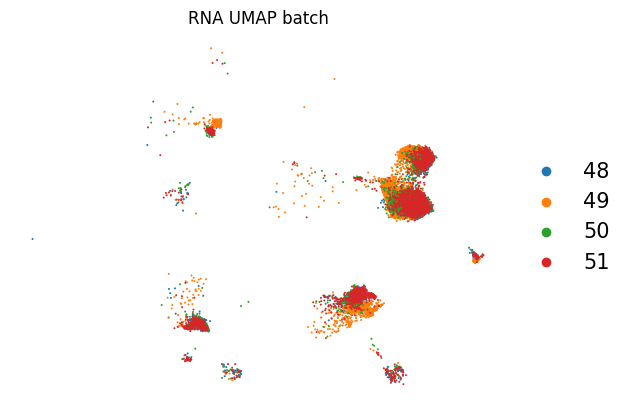

In [6]:
sc.pl.umap(adata, color='batch', title='RNA UMAP batch', frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [7]:
adata[adata.obs.batch == '49'].obs['Broad cell type (numbers)']

EZ01_GCATGTACATTGGGCC-lung         25. Immune (alveolar macrophage)
EZ01_GGAACTTTCTTGCCGT-lung         25. Immune (alveolar macrophage)
EZ01_TGACTTTGTTATGTGC-lung         25. Immune (alveolar macrophage)
EZ01_GTACTTTCAAGCGAGT-lung            9. Epithelial cell (ciliated)
EZ01_CCAATCCCAGTTCCCT-lung    6. Epithelial cell (alveolar type II)
                                              ...                  
EZ01_AGGCCACCACCAGGTC-lung               21. Immune (DC/macrophage)
EZ01_GTTCGGGGTCAAAGCG-lung               10. Epithelial cell (club)
EZ01_TACGGTACAAGAGTCG-lung         25. Immune (alveolar macrophage)
EZ01_GTAACGTCAATAGCGG-lung         25. Immune (alveolar macrophage)
EZ01_TTGGCAAGTTGTGGAG-lung         25. Immune (alveolar macrophage)
Name: Broad cell type (numbers), Length: 5196, dtype: category
Categories (13, object): ['2. Endothelial cell (lymphatic)', '3. Endothelial cell (vascular)',
                          '5. Epithelial cell (alveolar type I)', '6. Epithelial cell (alveola

## Slicing one batch

In [8]:
ada = adata[adata.obs.batch == '49'].copy()
ada

AnnData object with n_obs × n_vars = 5196 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symbol', 'Ap

## Filtering and quality control

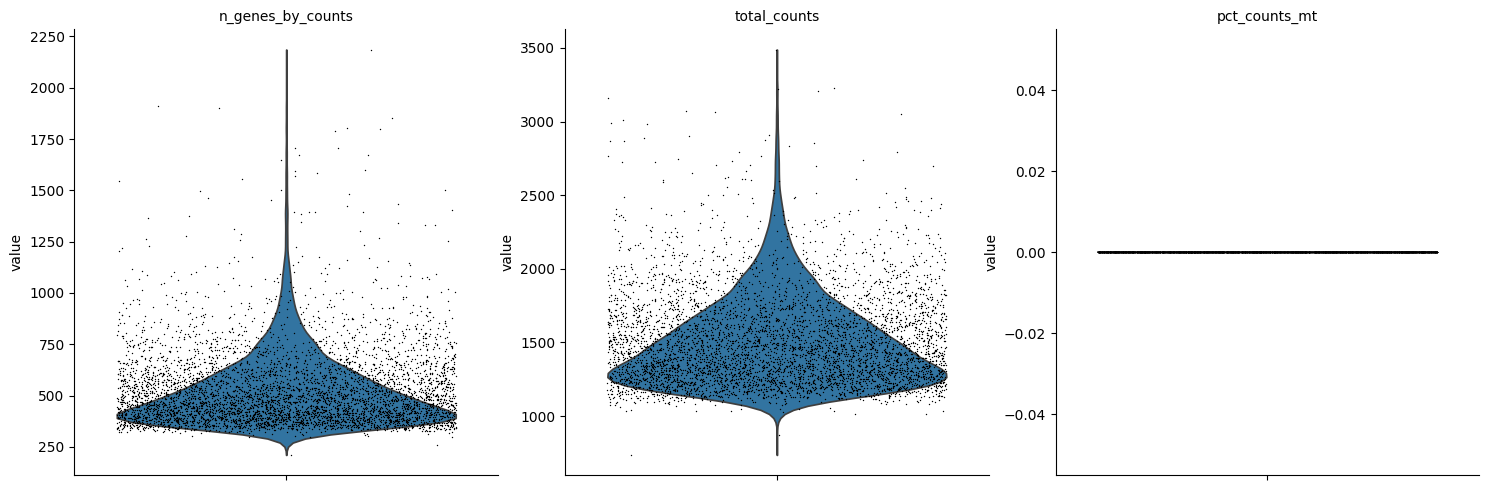

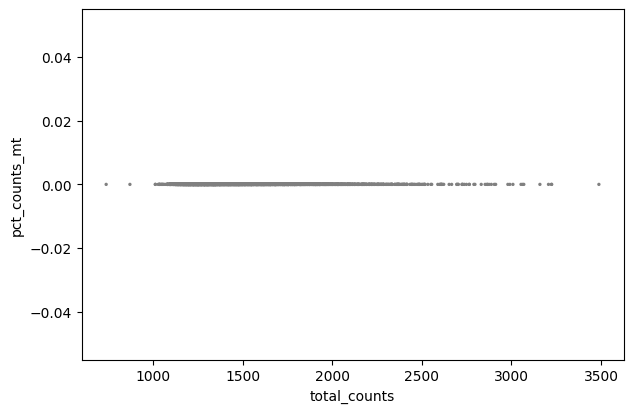

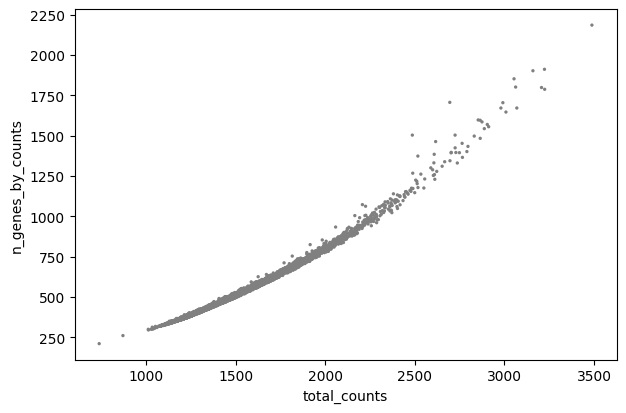

AnnData object with n_obs × n_vars = 5196 × 14778
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'g

In [9]:
sc.pp.filter_cells(ada, min_genes=200)
sc.pp.filter_genes(ada, min_cells=3)

ada.var['mt'] = ada.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(ada, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(ada, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)
sc.pl.scatter(ada, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(ada, x="total_counts", y="n_genes_by_counts")
ada

In [10]:
# Filter cells following standard QC criteria.
ada = ada[ada.obs.n_genes_by_counts < 2000, :]

## Normalization, scaling, dimensionality reduction and clustering

In [11]:
# Normalize the data
sc.pp.normalize_total(ada, target_sum=1e4)
sc.pp.log1p(ada)
ada.layers['log_norm'] = ada.X.copy()

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


<ipython-input-12-beed4591abc9>:21: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(ada)


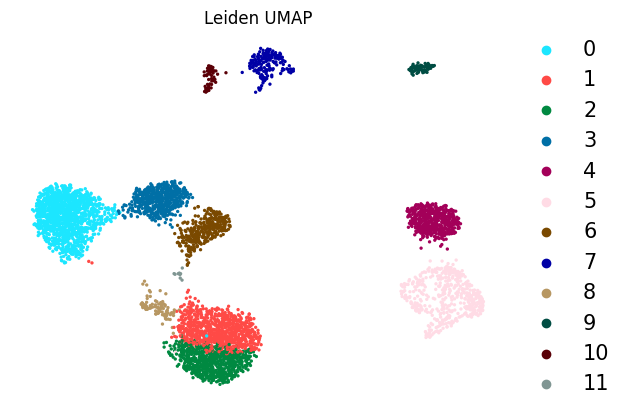

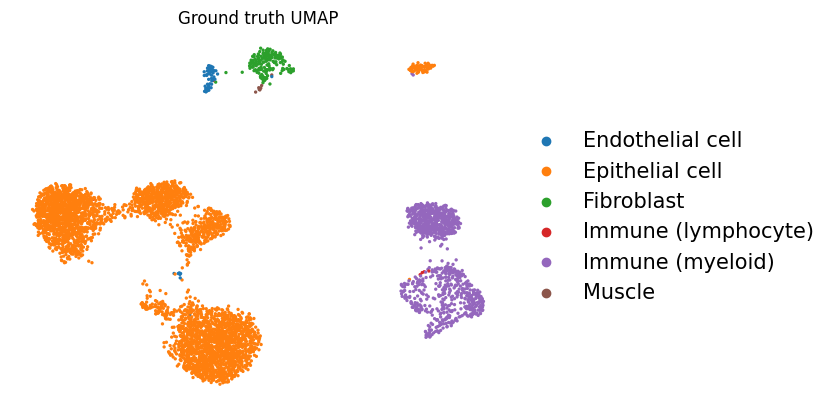

In [12]:
# Identify the highly variable genes
sc.pp.highly_variable_genes(ada, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Regress and scale the data
sc.pp.regress_out(ada, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(ada, max_value=10)

# Generate PCA features
sc.tl.pca(ada, svd_solver='arpack')

#Restore X to be norm counts
dc.swap_layer(ada, 'log_norm', X_layer_key=None, inplace=True)

# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(ada, n_neighbors=10, n_pcs=40)

# Generate UMAP features
sc.tl.umap(ada)

# Run leiden clustering algorithm
sc.tl.leiden(ada)

# Visualize
sc.pl.umap(ada, color='leiden', title='Leiden UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)
sc.pl.umap(ada, color='Cell types level 2', title='Ground truth UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)


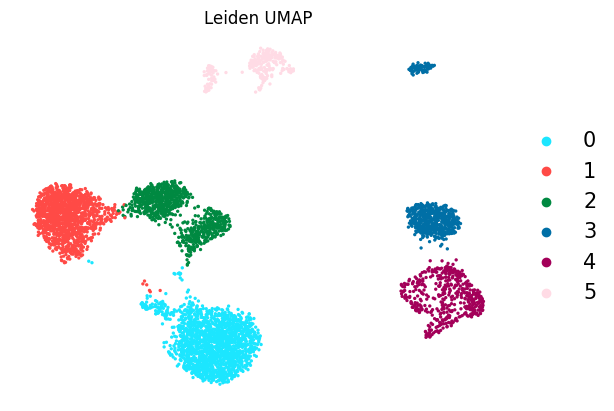

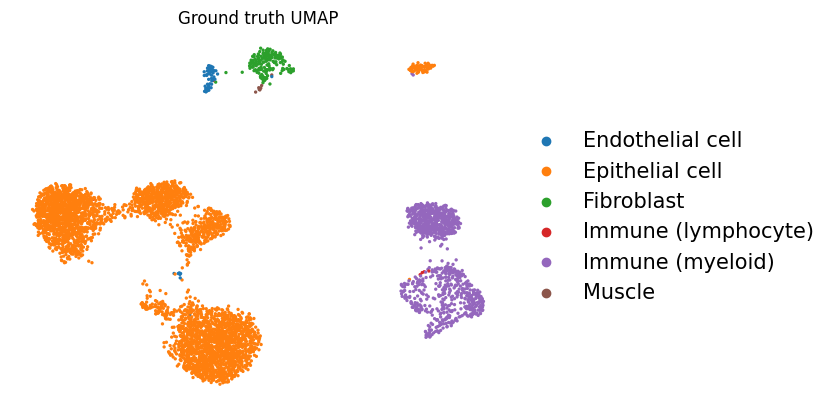

In [13]:
sc.tl.leiden(ada, resolution=0.05)
# Visualize
sc.pl.umap(ada, color='leiden', title='Leiden UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)
sc.pl.umap(ada, color='Cell types level 2', title='Ground truth UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

## Cell type annotation


In [14]:
markers = dc.get_resource('PanglaoDB')
markers

,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
0,CTRB1,False,Enterocytes,Endoderm,True,0.000000,0.004394,True,0.003311,0.020480,9606,GI tract,0.017
1,CTRB1,True,Acinar cells,Endoderm,True,1.000000,0.000629,True,0.957143,0.015920,9606,Pancreas,0.017
2,KLK1,True,Endothelial cells,Mesoderm,True,0.000000,0.008420,True,0.000000,0.014915,9606,Vasculature,0.013
3,KLK1,False,Goblet cells,Endoderm,True,0.588235,0.005039,True,0.903226,0.012408,9606,GI tract,0.013
4,KLK1,False,Epithelial cells,Mesoderm,True,0.000000,0.008233,True,0.225806,0.013758,9606,Epithelium,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,SLC14A1,True,Urothelial cells,Mesoderm,True,0.000000,0.018170,True,0.000000,0.000000,9606,Urinary bladder,0.008
8457,UPK3A,True,Urothelial cells,Mesoderm,True,0.000000,0.000000,True,0.000000,0.000000,9606,Urinary bladder,0.000
8458,UPK1A,True,Urothelial cells,Mesoderm,True,0.000000,0.000000,True,0.000000,0.000000,9606,Urinary bladder,0.000
8459,UPK2,True,Urothelial cells,Mesoderm,True,0.000000,0.000000,True,0.000000,0.000000,9606,Urinary bladder,0.000


In [15]:
# Filter by canonical_marker and human
markers = markers[markers['human'] & markers['canonical_marker'] & (markers['human_sensitivity'] > 0.5)]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]
markers

,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
1,CTRB1,True,Acinar cells,Endoderm,True,1.000000,0.000629,True,0.957143,0.015920,9606,Pancreas,0.017
6,KLK1,True,Acinar cells,Endoderm,True,0.833333,0.005031,True,0.314286,0.012826,9606,Pancreas,0.013
14,PRSS3,True,Acinar cells,Endoderm,True,0.833333,0.028931,True,0.028571,0.000000,9606,Pancreas,0.006
15,CELA3A,True,Acinar cells,Endoderm,True,0.833333,0.000000,True,0.128571,0.000000,9606,Pancreas,0.001
17,PRSS1,True,Acinar cells,Endoderm,True,1.000000,0.005975,True,0.028571,0.000000,9606,Pancreas,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8260,TRBC2,True,T cells,Mesoderm,True,0.940711,0.083362,True,0.000000,0.000000,9606,Immune system,0.066
8266,TRAC,True,T cytotoxic cells,Mesoderm,True,1.000000,0.131348,True,0.000000,0.000000,9606,Immune system,0.042
8267,TRAC,True,T cells,Mesoderm,True,0.972332,0.059544,True,0.000000,0.000000,9606,Immune system,0.042
8297,LCK,True,T cells,Mesoderm,True,0.648221,0.033004,True,0.705607,0.030902,9606,Immune system,0.048


In [16]:
dc.run_ora(
    mat=ada,
    net=markers,
    source='cell_type',
    target='genesymbol',
    min_n=3,
    verbose=True,
    use_raw=False
)

Running ora on mat with 5195 samples and 14778 targets for 49 sources.


100%|██████████| 5195/5195 [00:09<00:00, 553.41it/s]


In [17]:
ada.obsm['ora_estimate']

source,Acinar cells,Adipocytes,Alpha cells,Astrocytes,B cells,B cells naive,Beta cells,Cholangiocytes,Clara cells,Delta cells,...,Pancreatic stellate cells,Pericytes,Plasma cells,Plasmacytoid dendritic cells,Platelets,Podocytes,Proximal tubule cells,Pulmonary alveolar type II cells,Smooth muscle cells,T cells
EZ01_GCATGTACATTGGGCC-lung,-0.000000,1.297591,0.584843,1.220967,3.323148,3.697223,-0.0,-0.0,-0.000000,-0.000000,...,0.439378,0.694166,1.482487,-0.000000,5.465181,-0.000000,0.890202,-0.000000,-0.0,3.697223
EZ01_GGAACTTTCTTGCCGT-lung,0.307713,2.304289,-0.000000,0.469586,3.323148,3.697223,-0.0,-0.0,-0.000000,0.765462,...,0.439378,0.694166,0.584843,0.469586,1.963014,-0.000000,0.325257,0.325257,-0.0,1.383939
EZ01_TGACTTTGTTATGTGC-lung,-0.000000,1.297591,-0.000000,1.220967,3.323148,2.447173,-0.0,-0.0,-0.000000,0.765462,...,0.439378,0.694166,1.482487,-0.000000,1.963014,0.291461,0.325257,-0.000000,-0.0,2.447173
EZ01_CCAATCCCAGTTCCCT-lung,-0.000000,-0.000000,-0.000000,0.469586,0.765462,1.383939,-0.0,-0.0,1.596794,-0.000000,...,-0.000000,-0.000000,0.584843,0.469586,0.412146,0.291461,0.890202,8.642119,-0.0,0.541423
EZ01_TTCTCAACACCAGATT-lung,-0.000000,1.297591,-0.000000,0.469586,0.765462,0.541423,-0.0,-0.0,0.635052,-0.000000,...,-0.000000,-0.000000,0.584843,-0.000000,0.412146,0.291461,-0.000000,4.662272,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EZ01_AGGCCACCACCAGGTC-lung,1.567054,0.503347,0.584843,-0.000000,0.765462,0.541423,-0.0,-0.0,1.596794,-0.000000,...,0.439378,-0.000000,-0.000000,-0.000000,1.090182,0.291461,-0.000000,0.325257,-0.0,1.383939
EZ01_GTTCGGGGTCAAAGCG-lung,1.567054,0.503347,-0.000000,-0.000000,0.765462,1.383939,-0.0,-0.0,5.872354,-0.000000,...,-0.000000,0.694166,-0.000000,-0.000000,-0.000000,0.811260,-0.000000,3.537170,-0.0,1.383939
EZ01_TACGGTACAAGAGTCG-lung,1.567054,0.503347,-0.000000,-0.000000,3.323148,2.447173,-0.0,-0.0,1.596794,-0.000000,...,-0.000000,-0.000000,0.584843,0.469586,0.412146,0.291461,-0.000000,0.325257,-0.0,1.383939
EZ01_GTAACGTCAATAGCGG-lung,1.567054,0.503347,-0.000000,-0.000000,0.765462,0.541423,-0.0,-0.0,1.596794,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.291461,-0.000000,0.325257,-0.0,1.383939


In [18]:
acts = dc.get_acts(ada, obsm_key='ora_estimate')

# We need to remove inf and set them to the maximum value observed for pvals=0
acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts

AnnData object with n_obs × n_vars = 5195 × 49
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    uns: 'Broad cell type (numbers)_colors', 'Broad cell type numbers_colors', 'Broad cell type_colors',

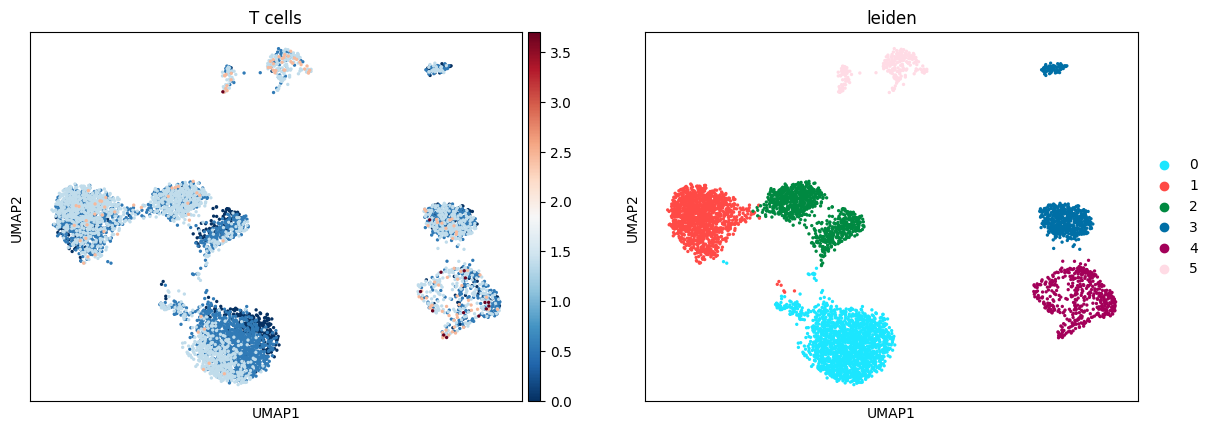

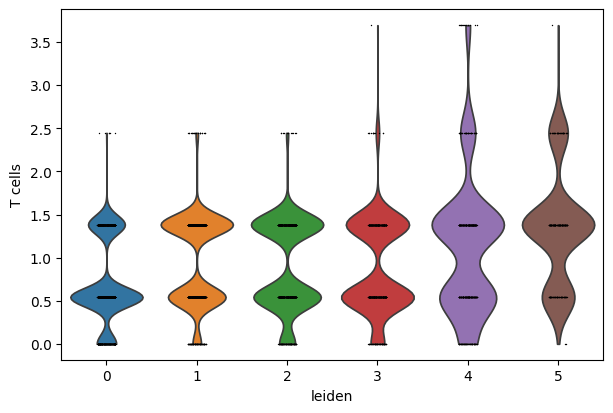

In [19]:
sc.pl.umap(acts, color=['T cells', 'leiden'], cmap='RdBu_r')
sc.pl.violin(acts, keys=['T cells'], groupby='leiden')

In [20]:
df = dc.rank_sources_groups(acts, groupby='leiden', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,0,rest,Pulmonary alveolar type II cells,44.338775,3.784272,0.000000e+00,0.000000e+00
1,0,rest,Clara cells,32.760490,1.177806,3.267392e-203,8.005111e-202
2,0,rest,Proximal tubule cells,20.635744,0.333028,1.350037e-87,2.205060e-86
3,0,rest,Ductal cells,15.000724,0.274386,3.990087e-49,2.443928e-48
4,0,rest,Gamma (PP) cells,12.994030,0.187663,1.345569e-37,4.395525e-37
...,...,...,...,...,...,...,...
289,5,rest,B cells naive,-8.187063,-0.410227,3.339188e-15,1.022626e-14
290,5,rest,Astrocytes,-8.587401,-0.214241,2.349858e-16,7.963959e-16
291,5,rest,Cholangiocytes,-8.845374,-0.208265,1.589276e-16,5.990347e-16
292,5,rest,Ductal cells,-9.683765,-0.326846,3.510776e-19,1.563891e-18


In [21]:
n_ctypes = 3
ctypes_dict = df.groupby('group').head(n_ctypes).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
ctypes_dict

{'0': ['Pulmonary alveolar type II cells',
  'Clara cells',
  'Proximal tubule cells'],
 '1': ['Cholangiocytes', 'Enterocytes', 'Pulmonary alveolar type II cells'],
 '2': ['Podocytes', 'Mammary epithelial cells', 'Cholangiocytes'],
 '3': ['Enterocytes', 'Pericytes', 'Adipocytes'],
 '4': ['Dendritic cells', 'Macrophages', 'B cells'],
 '5': ['Pancreatic stellate cells', 'Hepatic stellate cells', 'Fibroblasts']}

In [22]:
# df2 = dc.rank_sources_groups(acts, groupby='Cell types level 2', reference='rest', method='t-test_overestim_var')
# ctypes_dict2 = df2.groupby('group').head(n_ctypes).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
# ctypes_dict2

In [23]:
predicted_types = ada.obsm['ora_estimate'].idxmax(axis=1)
predicted_types

EZ01_GCATGTACATTGGGCC-lung                     Dendritic cells
EZ01_GGAACTTTCTTGCCGT-lung                     Dendritic cells
EZ01_TGACTTTGTTATGTGC-lung                     Dendritic cells
EZ01_CCAATCCCAGTTCCCT-lung    Pulmonary alveolar type II cells
EZ01_TTCTCAACACCAGATT-lung    Pulmonary alveolar type II cells
                                            ...               
EZ01_AGGCCACCACCAGGTC-lung                         Clara cells
EZ01_GTTCGGGGTCAAAGCG-lung                         Clara cells
EZ01_TACGGTACAAGAGTCG-lung                     Dendritic cells
EZ01_GTAACGTCAATAGCGG-lung                         Enterocytes
EZ01_TTGGCAAGTTGTGGAG-lung                     Dendritic cells
Length: 5195, dtype: object

In [24]:
from collections import Counter
Counter(predicted_types)

Counter({'Dendritic cells': 497,
         'Pulmonary alveolar type II cells': 3105,
         'Luminal epithelial cells': 72,
         'Ependymal cells': 7,
         'Clara cells': 312,
         'Macrophages': 52,
         'Germ cells': 34,
         'Leydig cells': 1,
         'Podocytes': 25,
         'B cells naive': 94,
         'Mammary epithelial cells': 38,
         'B cells': 22,
         'Mast cells': 1,
         'Ductal cells': 14,
         'Mesangial cells': 72,
         'Neurons': 10,
         'Monocytes': 12,
         'Fibroblasts': 53,
         'Endothelial cells': 67,
         'Cholangiocytes': 3,
         'Plasma cells': 1,
         'Adipocytes': 29,
         'Pancreatic stellate cells': 57,
         'Enterocytes': 509,
         'Proximal tubule cells': 6,
         'Acinar cells': 18,
         'Erythroid-like and erythroid precursor cells': 7,
         'Smooth muscle cells': 6,
         'Keratinocytes': 4,
         'NK cells': 3,
         'Gamma (PP) cells': 3,
         '

In [25]:
ada.obs['Broad cell type (numbers)'].unique()

['25. Immune (alveolar macrophage)', '6. Epithelial cell (alveolar type II)', '9. Epithelial cell (ciliated)', '5. Epithelial cell (alveolar type I)', '8. Epithelial cell (basal)', ..., '3. Endothelial cell (vascular)', '24. Immune (T cell)', '39. Pericyte/SMC', '2. Endothelial cell (lymphatic)', '19. Immune (B cell)']
Length: 13
Categories (13, object): ['2. Endothelial cell (lymphatic)', '3. Endothelial cell (vascular)',
                          '5. Epithelial cell (alveolar type I)', '6. Epithelial cell (alveolar type II)', ...,
                          '21. Immune (DC/macrophage)', '24. Immune (T cell)',
                          '25. Immune (alveolar macrophage)', '39. Pericyte/SMC']

Text(0.5, 1.0, 'Contingency Matrix')

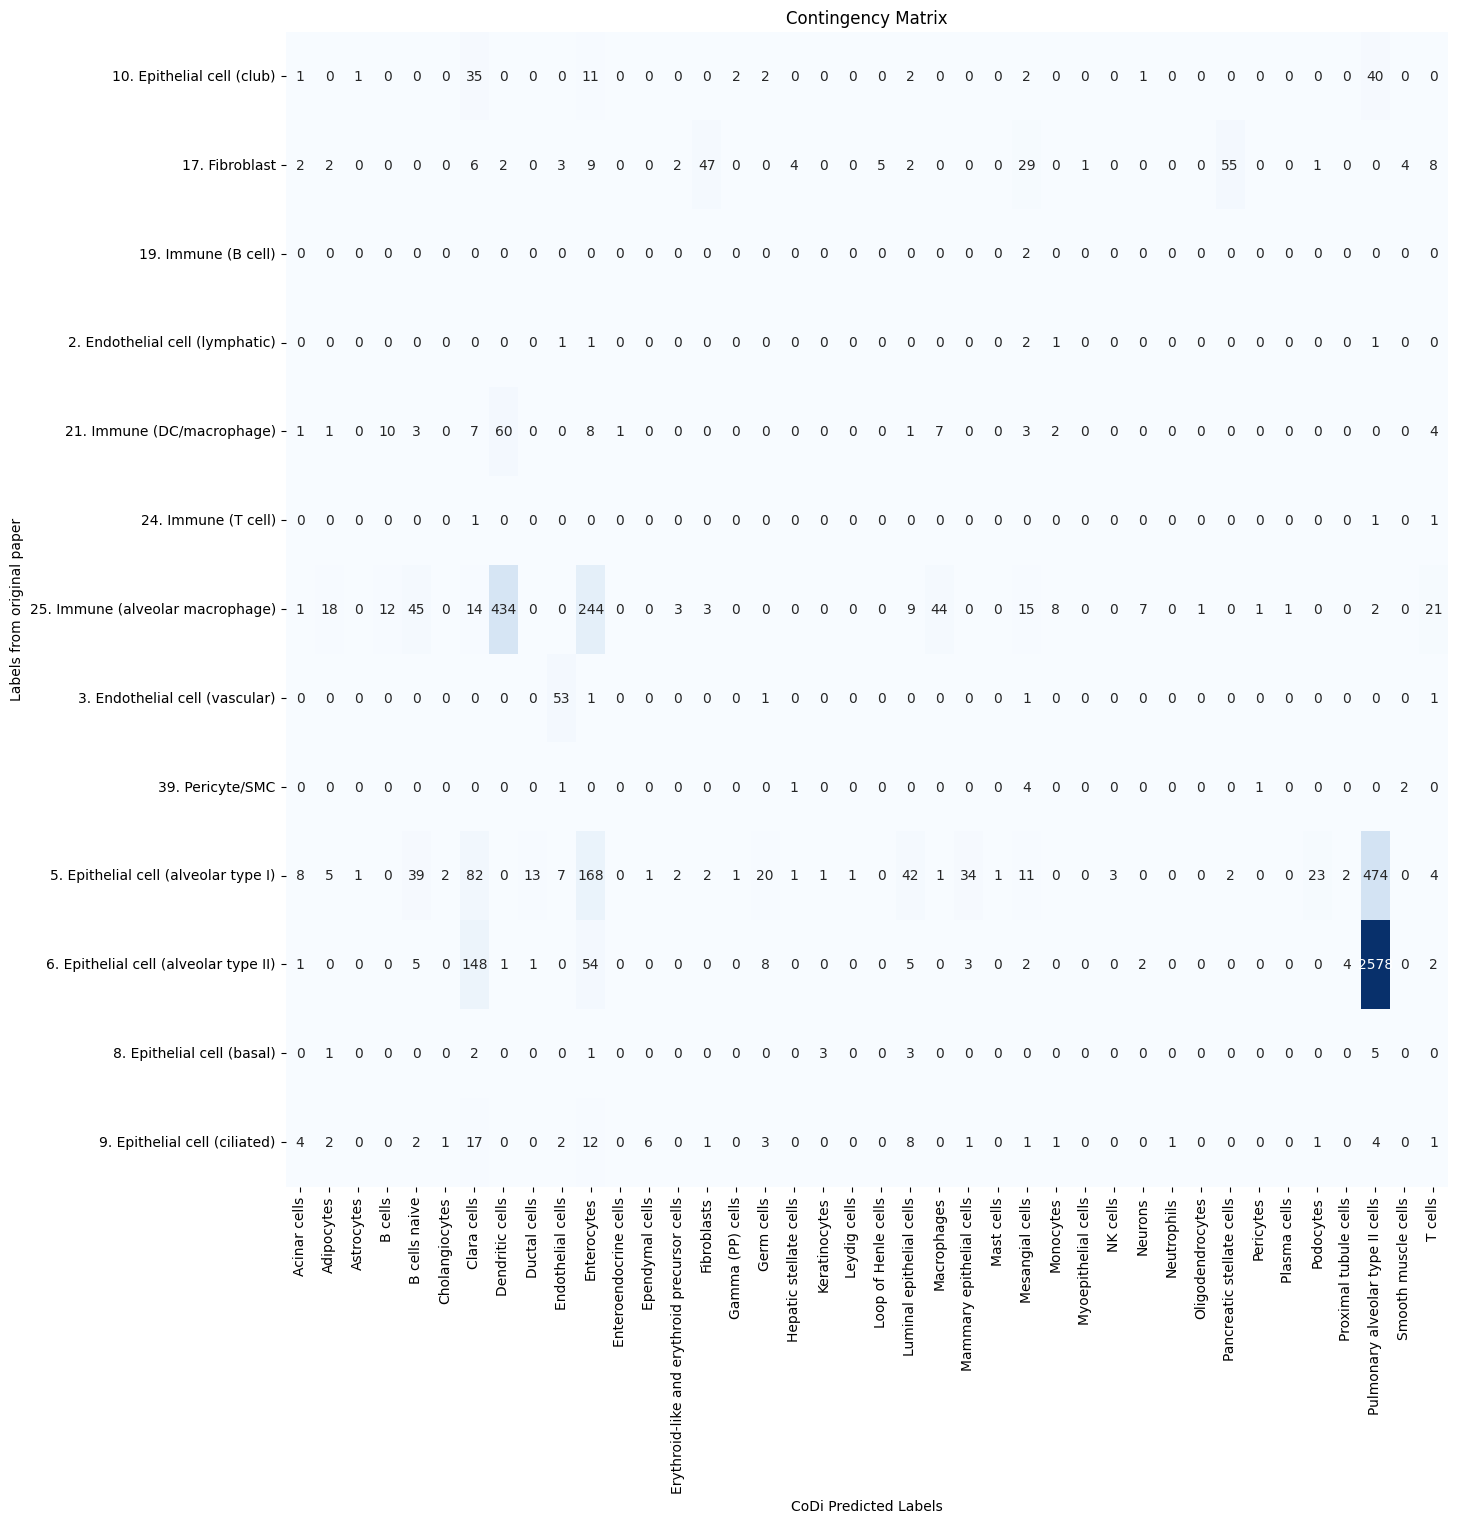

In [26]:
from sklearn.metrics.cluster import contingency_matrix
cm = contingency_matrix(ada.obs.loc[:, 'Broad cell type (numbers)'], predicted_types)
# Visualize the confusion matrix using Seaborn
class_labels_y = np.unique(ada.obs.loc[:, 'Broad cell type (numbers)'])
class_labels_x = np.unique(predicted_types)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels_x, yticklabels=class_labels_y)
plt.xlabel("CoDi Predicted Labels")
plt.ylabel("Labels from original paper")
plt.title("Contingency Matrix")
# plt.savefig(out_name, dpi=150, bbox_inches='tight')

## Different parameters and preprocessing

In [27]:
ada2 = adata[adata.obs.batch == '49'].copy()

sc.pp.filter_cells(ada2, min_genes=200)
sc.pp.filter_genes(ada2, min_cells=3)

# Normalize the data
sc.pp.normalize_total(ada2, target_sum=1e4)
sc.pp.log1p(ada2)

sc.pp.scale(ada2)

# Generate PCA features
sc.tl.pca(ada2, svd_solver='arpack')
# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(ada2, n_neighbors=10, n_pcs=40)

# Generate UMAP features
sc.tl.umap(ada2)



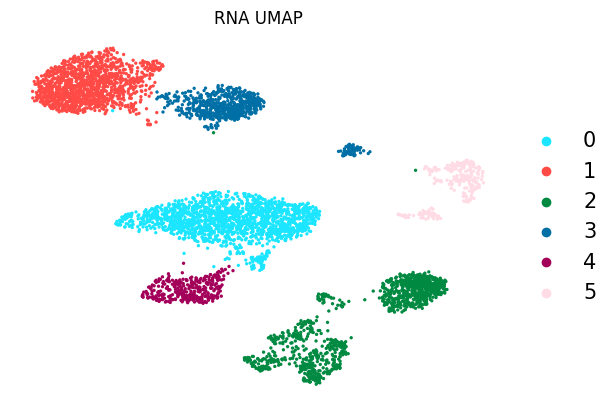

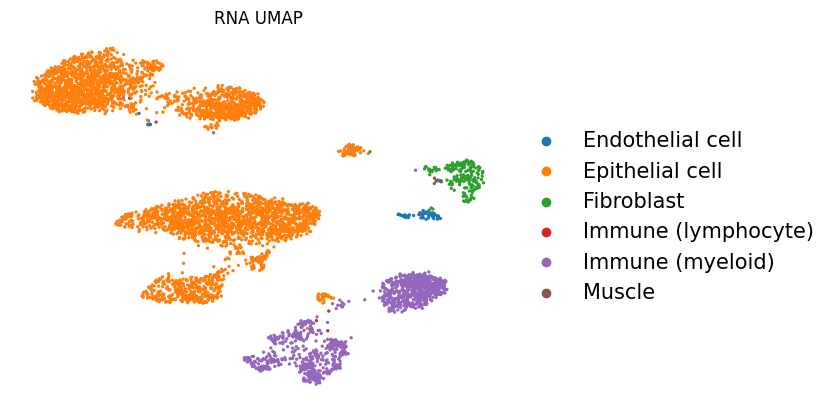

In [28]:
# Run leiden clustering algorithm
sc.tl.leiden(ada2, resolution=0.05)

# Visualize
sc.pl.umap(ada2, color='leiden', title='RNA UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)
# Visualize
sc.pl.umap(ada2, color='Cell types level 2', title='RNA UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [29]:
dc.run_ora(
    mat=ada2,
    net=markers,
    source='cell_type',
    target='genesymbol',
    min_n=3,
    verbose=True,
    use_raw=False
)
acts2 = dc.get_acts(ada2, obsm_key='ora_estimate')

# We need to remove inf and set them to the maximum value observed for pvals=0
acts_v2 = acts2.X.ravel()
max_e2 = np.nanmax(acts_v2[np.isfinite(acts_v2)])
acts2.X[~np.isfinite(acts2.X)] = max_e2

df2 = dc.rank_sources_groups(acts2, groupby='leiden', reference='rest', method='t-test_overestim_var')
ctypes_dict2 = df.groupby('group').head(n_ctypes).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
ctypes_dict2

Running ora on mat with 5196 samples and 14778 targets for 49 sources.


100%|██████████| 5196/5196 [00:17<00:00, 303.65it/s]


{'0': ['Pulmonary alveolar type II cells',
  'Clara cells',
  'Proximal tubule cells'],
 '1': ['Cholangiocytes', 'Enterocytes', 'Pulmonary alveolar type II cells'],
 '2': ['Podocytes', 'Mammary epithelial cells', 'Cholangiocytes'],
 '3': ['Enterocytes', 'Pericytes', 'Adipocytes'],
 '4': ['Dendritic cells', 'Macrophages', 'B cells'],
 '5': ['Pancreatic stellate cells', 'Hepatic stellate cells', 'Fibroblasts']}

In [4]:
# Load and preprocess the entire dataset
adata = ad.read_h5ad('GTEX-1HSMQ-5005.h5ad')
#adata = adata[adata.obs.batch == '49'].copy()

# Quality control
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"])

# Normalization, scaling, and preprocessing
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Define relevant regression columns based on QC metrics
regression_columns = ['PercentMito', 'nUMIs']

# Regress out unwanted sources of variation
sc.pp.regress_out(adata, regression_columns)
sc.pp.scale(adata)

# Dimensionality reduction and clustering
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

# Calculate Davies-Bouldin score for normalized analysis
from sklearn.metrics import davies_bouldin_score
db_score_normalized = davies_bouldin_score(adata.obsm['X_umap'], adata.obs['leiden'])

# Repeat analysis without normalization
adata_unnormalized = ad.read_h5ad('GTEX-1HSMQ-5005.h5ad')
#adata_unnormalized = adata_unnormalized[adata_unnormalized.obs.batch == '49'].copy()

sc.pp.filter_cells(adata_unnormalized, min_genes=200)
sc.pp.filter_genes(adata_unnormalized, min_cells=3)

sc.pp.pca(adata_unnormalized, svd_solver='arpack')
sc.pp.neighbors(adata_unnormalized, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_unnormalized)
sc.tl.leiden(adata_unnormalized)

# Calculate Davies-Bouldin score for unnormalized analysis
db_score_unnormalized = davies_bouldin_score(adata_unnormalized.obsm['X_umap'], adata_unnormalized.obs['leiden'])

# Compare scores
print("Davies-Bouldin Score (Normalized):", db_score_normalized)
print("Davies-Bouldin Score (Unnormalized):", db_score_unnormalized)

# Conclusions
if db_score_normalized < db_score_unnormalized:
    print("Normalized analysis yields better clustering (lower Davies-Bouldin score).")
else:
    print("Unnormalized analysis yields better clustering (lower Davies-Bouldin score).")


<ipython-input-4-f4546cda29b0>:26: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


Davies-Bouldin Score (Normalized): 0.8192900943229176
Davies-Bouldin Score (Unnormalized): 0.5580145230016726
Unnormalized analysis yields better clustering (lower Davies-Bouldin score).
